In [5]:
import numpy as np
from scipy.io.wavfile import read as wavread, write as wavwrite
from matplotlib import pyplot as plt

In [6]:
from google.colab import drive

In [7]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [8]:
# read an audio
# Considering Microsft Wav format PCM16(Pulse Code modulation)
# 16bit ranges from -2^15 to 2^15
sampling_rate, audio = wavread("/content/drive/MyDrive/Swecha/PTL.wav")
print(sampling_rate)

48000


In [9]:
audio.dtype

dtype('int16')

In [10]:
audio

array([ 0,  0,  0, ..., 38, 18, 24], dtype=int16)

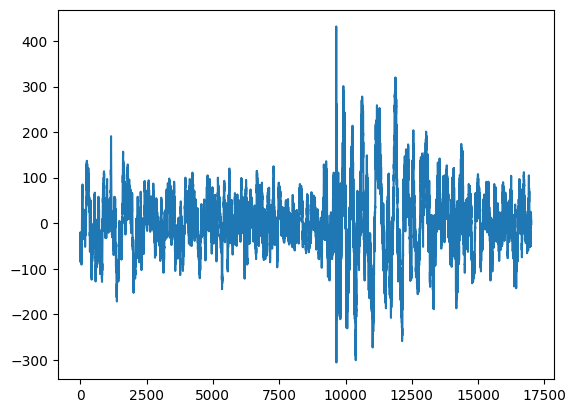

In [10]:
plt.plot(audio[28000:45000])

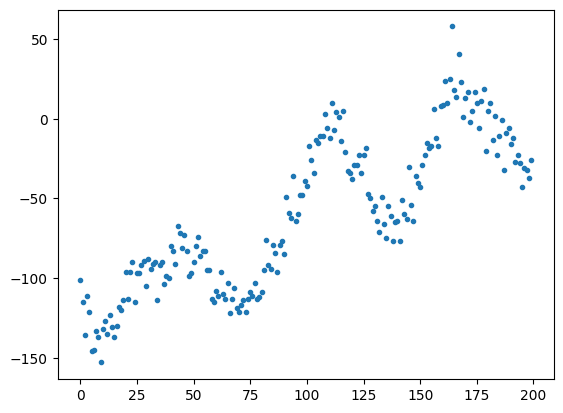

In [11]:
plt.plot(audio[30000:30200], ".")
plt.show()

# Realisation of Quantisation

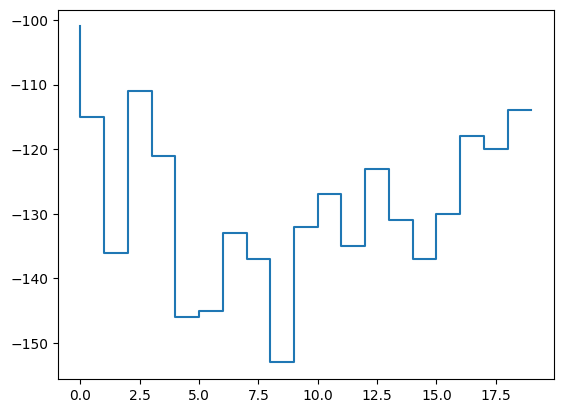

In [7]:
plt.step(range(20), audio[30000:30020])

# Speech PreProcessing

In [11]:
import librosa

In [12]:
speech = audio/2**15
sampling_rate = sampling_rate

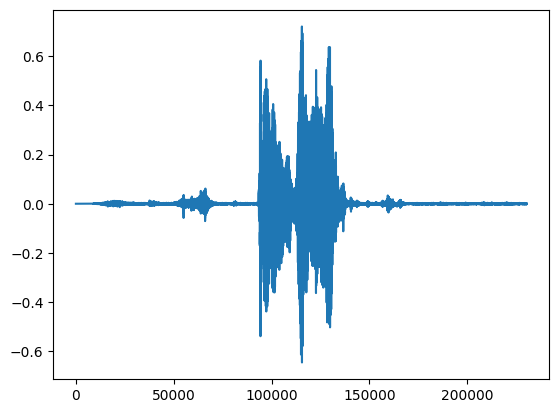

In [10]:
plt.plot(speech)

# ASR Inferencing

In [13]:
import torch

# Wav2Vec2

In [9]:
!pip install --upgrade torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 965.6 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none

In [1]:
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor

In [2]:
device = "cpu"

In [3]:
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h-lv60-self")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h-lv60-self").to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/158 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/162 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/wav2vec2-large-960h-lv60-self were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h-lv60-self and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.maske

In [21]:
# Assuming 'speech' is your original audio data with a sampling rate of 48000
speech_resampled = librosa.resample(speech, orig_sr=48000, target_sr=16000)

# Now use 'speech_resampled' instead of 'speech' in your preprocessing step
input_values = processor(speech_resampled, sampling_rate=16000, return_tensors="pt", padding="longest").input_values


In [22]:
# pre processing
#input_values = processor(speech, sampling_rate=sampling_rate, return_tensors="pt", padding="longest").input_values

# model inference
with torch.no_grad():
    logits = model(input_values .to(device)).logits

# decoding and post processing
predicted_ids = torch.argmax(logits, dim=-1)
transcription = processor.batch_decode(predicted_ids)[0].lower()

print(transcription)

praise the lord
